In [9]:
import pandas as pd


In [2]:
df_list=pd.read_csv(r'C:\Users\JP\Downloads\Learning\Udacity\Proc\archive\listings.csv')
df_cal=pd.read_csv(r'C:\Users\JP\Downloads\Learning\Udacity\Proc\archive\calendar.csv')
df_rvw=pd.read_csv(r'C:\Users\JP\Downloads\Learning\Udacity\Proc\archive\reviews.csv')

In [3]:
# list_null_feat = list(  df_list.columns [ df_list.isnull().sum()/ df_list.shape[0]>0.5 ]  ) 
# cal_null_feat = list(  df_cal.columns [ df_cal.isnull().sum()/ df_cal.shape[0]>0.1 ]  ) 
# rvw_null_feat = list(  df_rvw.columns [ df_rvw.isnull().sum()/ df_rvw.shape[0]>0.1 ]  ) 

# print(list_null_feat )
# print(cal_null_feat )
# print(rvw_null_feat )


['square_feet', 'monthly_price', 'security_deposit', 'license']
['price']
[]


In [5]:
#Convert date field to date datatyp
df_cal['date'] = pd.to_datetime(df_cal['date'])
df_cal['Month'] = pd.to_datetime(df_cal['date']).dt.month
df_cal['Year'] = pd.to_datetime(df_cal['date']).dt.year

In [6]:
#Remove dollar symbol from price column
df_cal['price']=df_cal['price'].replace('[\$,]', '', regex=True).astype(float)

### Price trend of airbnb in seattle

In [7]:
df_cal.groupby(['Year','Month']).mean()['price']

Year  Month
2016  1        121.568409
      2        124.293927
      3        128.644488
      4        135.097005
      5        139.538183
      6        147.473137
      7        152.094150
      8        150.656594
      9        143.255949
      10       137.031939
      11       135.688738
      12       137.251835
2017  1        136.882590
Name: price, dtype: float64

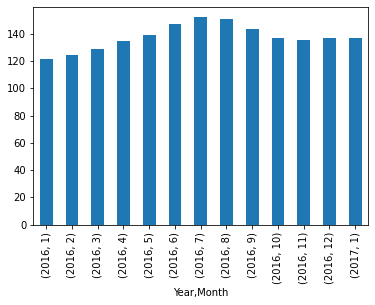

In [8]:
df_cal_groups=df_cal.groupby(['Year','Month']).mean()['price']

df_cal_groups.plot(kind='bar')

In [12]:
df_rvw['date'] = pd.to_datetime(df_rvw['date'])
df_rvw['Month'] = pd.to_datetime(df_rvw['date']).dt.month
df_rvw['Year'] = pd.to_datetime(df_rvw['date']).dt.year

In [13]:
df_list['last_scraped'] = pd.to_datetime(df_list['last_scraped'])

### Airbnb booking trend

In [11]:
df_cal.groupby(['Year','Month']).count()['listing_id']

Year  Month
2016  1        106904
      2        110722
      3        118358
      4        114540
      5        118358
      6        114540
      7        118358
      8        118358
      9        114540
      10       118358
      11       114540
      12       118358
2017  1          7636
Name: listing_id, dtype: int64

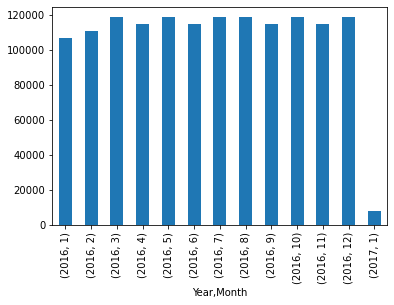

In [10]:

df_cal_lst_groups=df_cal.groupby(['Year','Month']).count()['listing_id']

df_cal_lst_groups.plot(kind='bar')

### Review trend in Airbnb

In [15]:
df_rvw[df_rvw.Year==2016].groupby(['Year','Month']).count()['listing_id']

Year  Month
2016  1        223
Name: listing_id, dtype: int64

In [ ]:
# which is cheapest month to visit seatl
# Does the listing goes down during cheaper months 
# Does revieiwing habit of visitor changes between cheaper and busy months